# 4. Train ConvNN Model: Regression Method


In the following steps, you will: 

- Load the brown dwarf dataset used to train the ML models
- Prepare the X and y variables to deploy the trained ML models
- Visualize them for few cases

We will need the following modules from `TelescopeML`:

- *DeepBuilder*: to prepare the syntheric brown dwarf dataset, load the trained machine learning (ML) models
- *Predictor*: to prepare the observatinal brown dwarf dataset and deploy the trained ML models
- *StatVisAnalyzer*: provide statistical-test and plotting function  
- *IO_utils*: provide functions to load the trained ML models

In [1]:
from TelescopeML.DataMaster import *
from TelescopeML.DeepTrainer import *
from TelescopeML.Predictor import *
from TelescopeML.IO_utils import load_or_dump_trained_model_CNN
from TelescopeML.StatVisAnalyzer import *

No Bottleneck unit testing available.


Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

## 3.1 Data Preperation 

### 3.1.1 Load the Synthetic spectra - training dataset

We computed a low-resolution spectrum ($R$=200) utilizing atmopshric brown dwarfs grid model, [*Sonora-Bobcat*](https://arxiv.org/pdf/2107.07434.pdf) for spectral range $\sim$0.9-2.4 $\mu m$. An open-source atmospheric radiative transfer Python package, [*PICASO*](https://natashabatalha.github.io/picaso/) was employed for generating these datasets. This dataset encompass 30,888 synthetic spectra (or instances or rows). 

Each spectrum has 104 features (or wavelengths in the astrophysics context, i.e., 0.897, 0.906, ..., 2.512~$\mu$m) and 4 parameters:
- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

In [2]:
# Read the `TelescopeML_reference_data` path

import os  # to check the path  

__reference_data_path__ = os.getenv("TelescopeML_reference_data")
__reference_data_path__

'/Users/egharibn/RESEARCH/ml/projects/TelescopeML_project/reference_data/'

 Load the dataset and check few instances 

In [3]:
train_BD = pd.read_csv(os.path.join(__reference_data_path__, 
                                    'training_datasets', 
                                    'browndwarf_R100_v4_newWL_v2.csv.bz2'), compression='bz2')
train_BD.head(5)

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897,is_augmented
0,5.0,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
1,5.0,1100,0.25,-0.7,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
2,5.0,1100,0.25,-0.5,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
3,5.0,1100,0.25,-0.3,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
4,5.0,1100,0.25,0.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no


### 3.1.2 Check atmospheric parameters

- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!

In [4]:
target_features = ['gravity', 'temperature', 'c_o_ratio', 'metallicity']
train_BD[target_features].head()

,gravity,temperature,c_o_ratio,metallicity
0,5.0,1100,0.25,-1.0
1,5.0,1100,0.25,-0.7
2,5.0,1100,0.25,-0.5
3,5.0,1100,0.25,-0.3
4,5.0,1100,0.25,0.0


In [5]:
# training_features_labels: they are Wavelengths variables in string format

training_features_labels = [item for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_labels[:5]

['2.512', '2.487', '2.462', '2.438', '2.413']

In [6]:
# training_features_wl: they are Wavelengths variables 

training_features_wl = [float(item) for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_wl[:5]

[2.512, 2.487, 2.462, 2.438, 2.413]

In [7]:
wl_synthetic = pd.read_csv(os.path.join(__reference_data_path__, 
                                        'training_datasets', 
                                        'wl.csv'))
wl_synthetic.head(3)

,wl
0,2.511960
1,2.486966
2,2.462220


### 3.1.3 Prepare Inputs and outputs for ML models (X,y)
- X: 104 column variables or fluxes
- y: output variables: 'gravity', 'temperature',  'c_o_ratio', 'metallicity'

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!


In [8]:
# to assure we are only training the module with the native non-augmented BD training dataset
train_BD = train_BD[train_BD['is_augmented'].isin(['no'])] 


# Training feature variables
X = train_BD.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity', 
             'is_augmented'])#.astype(np.float32)


# Target/Output feature variables
y = train_BD[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]#.astype(np.float32)


log-transform the 'temperature' variable toreduce the skewness of the data, making it more symmetric and normal-like for the ML model


In [9]:
y.loc[:, 'temperature'] = np.log10(y['temperature'])

In [10]:
# check the output variables
y.head()

,gravity,c_o_ratio,metallicity,temperature
0,5.0,0.25,-1.0,3.041393
1,5.0,0.25,-0.7,3.041393
2,5.0,0.25,-0.5,3.041393
3,5.0,0.25,-0.3,3.041393
4,5.0,0.25,0.0,3.041393


---

## 3.2 Build the CNN model and Processing the Data

Here we instintiate BuildRegressorCNN class from DeepBuilder module to prepare the datasets and take the trained CNN (Convolutional Neural Networks) for us:

- Take the synthetic datasets
- Process them, e.g.
    - Divide them to three sets: train, validation, and test sets
    - Scale y variables
    - Scale X variables
    - Create new features 
    

### 3.2.1 Instintiate BuildRegressorCNN class from DeepBuilder module

In [11]:
trained_Data_Processor = DataProcessor( 
                             feature_values=X.to_numpy(),
                             feature_names=X.columns,
                             target_values=y.to_numpy(),
                             target_name=['gravity', 'c_o_ratio', 'metallicity', 'temperature'],
                             is_tuned='yes',
                             param_grid=None,
                             spectral_resolution=100,
                             is_feature_improved='no',
                             is_augmented='no',
                             ml_model=None,
                             ml_model_str='CNN',
                                )

### 3.2.2 Split the dataset into train, validate and test sets

In [12]:
trained_Data_Processor.split_train_validation_test(test_size=0.1, 
                                                 val_size=0.1, 
                                                 random_state_=100,)

### 3.2.3 Standardize X Variables Row-wise 

In [13]:
# Scale the X features using MinMax Scaler
trained_Data_Processor.standardize_X_row_wise()

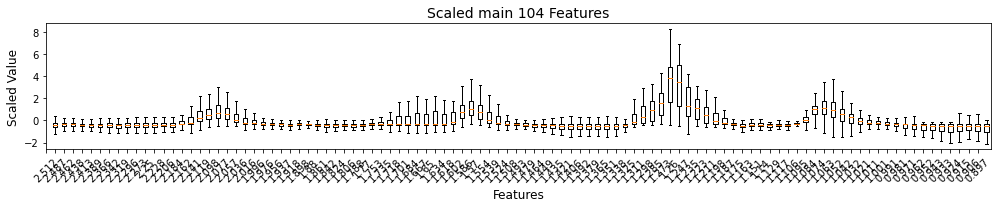

In [14]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.X_train_standardized_rowwise, 
                                                  xticks_list = training_features_labels,
                                                  title = 'Scaled main 104 Features',
                                                  fig_size=(14, 3),
                                                    )

### 3.2.4 Standardize y Variables Column-wise 

In [15]:
# Standardize the y features using Standard Scaler
trained_Data_Processor.standardize_y_column_wise()

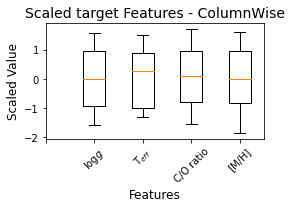

In [16]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.y_train_standardized_columnwise, 
                                                  xticks_list = ['','$\log g$', 'T$_{eff}$', 'C/O ratio', '[M/H]'],
                                                  title = 'Scaled target Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

### 3.2.5 Feature engeenering: Take Min and Max of each row (BD spectra) 

In [17]:
# train
trained_Data_Processor.X_train_min = trained_Data_Processor.X_train.min(axis=1)
trained_Data_Processor.X_train_max = trained_Data_Processor.X_train.max(axis=1)

# validation
trained_Data_Processor.X_val_min = trained_Data_Processor.X_val.min(axis=1)
trained_Data_Processor.X_val_max = trained_Data_Processor.X_val.max(axis=1)

# test
trained_Data_Processor.X_test_min = trained_Data_Processor.X_test.min(axis=1)
trained_Data_Processor.X_test_max = trained_Data_Processor.X_test.max(axis=1)

In [18]:
df_MinMax_train = pd.DataFrame((trained_Data_Processor.X_train_min, trained_Data_Processor.X_train_max)).T
df_MinMax_val = pd.DataFrame((trained_Data_Processor.X_val_min, trained_Data_Processor.X_val_max)).T
df_MinMax_test = pd.DataFrame((trained_Data_Processor.X_test_min, trained_Data_Processor.X_test_max)).T

In [19]:
df_MinMax_train.rename(columns={0:'min', 1:'max'}, inplace=True)

In [20]:
df_MinMax_train.head()

,min,max
0,2.984493e-18,4.560593e-11
1,6.833671e-15,2.317328e-09
2,2.870361e-14,5.564836e-09
3,5.696652e-19,5.071436e-11
4,1.321553e-10,1.636513e-07


### 3.2.6 Scale Min Max features - ColumnWise

In [21]:
trained_Data_Processor.standardize_X_column_wise(
                                                X_train = df_MinMax_train.to_numpy(),
                                                X_val   = df_MinMax_val.to_numpy(),
                                                X_test  = df_MinMax_test.to_numpy(),
                                                )

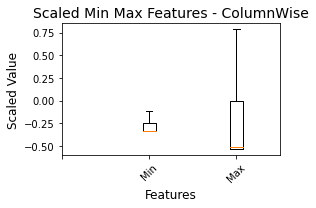

In [22]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.X_test_standardized_columnwise, 
                                                  xticks_list = ['','Min','Max'],
                                                  title = 'Scaled Min Max Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

## 3.3 Train CNN model

### 3.3.1 Instintiate *TrainRegressorCNN* class from *DeepTrainer* Module

In [23]:
train_cnn_model = TrainRegressorCNN(
            # input dataset: StandardScaled instances  
            X1_train = trained_Data_Processor.X_train_standardized_rowwise,
            X1_val   = trained_Data_Processor.X_val_standardized_rowwise,
            X1_test  = trained_Data_Processor.X_test_standardized_rowwise,

            # input dataset: Min Max of each instance  
            X2_train = trained_Data_Processor.X_train_standardized_columnwise,
            X2_val   = trained_Data_Processor.X_val_standardized_columnwise,
            X2_test  = trained_Data_Processor.X_test_standardized_columnwise,
#             X2_train = trained_Data_Processor.X_train_normalized_columnwise,
#             X2_val   = trained_Data_Processor.X_val_normalized_columnwise,
#             X2_test  = trained_Data_Processor.X_test_normalized_columnwise,

            # 1st target
            y1_train = trained_Data_Processor.y_train_standardized_columnwise[:,0],
            y1_val   = trained_Data_Processor.y_val_standardized_columnwise[:,0],
            y1_test  = trained_Data_Processor.y_test_standardized_columnwise[:,0],

            # 2nd target
            y2_train = trained_Data_Processor.y_train_standardized_columnwise[:,1],
            y2_val   = trained_Data_Processor.y_val_standardized_columnwise[:,1],
            y2_test  = trained_Data_Processor.y_test_standardized_columnwise[:,1],

            # 3rd target
            y3_train = trained_Data_Processor.y_train_standardized_columnwise[:,2],
            y3_val   = trained_Data_Processor.y_val_standardized_columnwise[:,2],
            y3_test  = trained_Data_Processor.y_test_standardized_columnwise[:,2],

            # 4th target
            y4_train = trained_Data_Processor.y_train_standardized_columnwise[:,3],
            y4_val   = trained_Data_Processor.y_val_standardized_columnwise[:,3],
            y4_test  = trained_Data_Processor.y_test_standardized_columnwise[:,3],
            )

### 3.3.2 Define the Hyperparameters

In [24]:
hyperparameters = {'Conv__MaxPooling1D': 2,
                 'Conv__num_blocks': 1,
                 'Conv__num_layers_per_block': 3,
                 'Conv__num_filters': 4,
                 'Conv__kernel_size': 6,
                   
                 'FC2__num_blocks': 4,
                 'FC2_num_layers_per_block': 2,
                 'FC__dropout': 0.0024609140719442646,
                 'FC2__dropout': 64,
                 'FC2__units': 64,
#                  'FC__units_gravity': 16,
#                  'FC__units_metallicity': 256,
#                  'FC__units_temperature': 8,
                   
                 'FC1__num_blocks': 1,
                 'FC1_num_layers_per_block': 4,
                 'FC2__dropout': 0.09889223768186726,
                 'FC1__units': 128,
                 'FC1__dropout': 0.002185843015008406,
                   
                 'learning_rate': 4.9946842008422193e-05}

In [25]:
# hyperparameters = {
#      'Conv__MaxPooling1D': 2,
#      'Conv__num_blocks': 1,
#      'Conv__num_layers_per_block': 3,
#      'Conv__num_filters': 4,
#      'Conv__kernel_size': 6,
#      'FC__NumberLayers': 4,
    
#      'FC1__num_blocks' : 1,
#      'FC1_num_layers_per_block': 2,
#      'FC1__dropout': 0.09889223768186726,
#      'FC1__units': 128,

#      'FC2__num_blocks' : 1,
#      'FC2_num_layers_per_block':2,
#      'FC2__dropout': 0.0024609140719442646,
#      'FC2__units': 64,

    
#      'learning_rate': 4.9946842008422193e-05}

### 3.3.3 Build a CNN model

In [26]:
train_cnn_model.build_model(hyperparameters = hyperparameters, 
                     )

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 16)              112       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 64)              6208      ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 144)             55440     ['Conv__B1_L2[0][0]']         


 MaxPool1D__B1_L3 (MaxPooli  (None, 52, 144)              0         ['Conv__B1_L3[0][0]']         


 ng1D)                                                                                            


 flatten (Flatten)           (None, 7488)                 0         ['MaxPool1D__B1_L3[0][0]']    


 FC1__B1_L1 (Dense)          (None, 512)                  3834368   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 2048)                 1050624   ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 4608)                 9441792   ['FC1__B1_L2[0][0]']          


 FC1__B1_L4 (Dense)          (None, 8192)                 3775692   ['FC1__B1_L3[0][0]']          


                                                          8                                       


 FC1__Dropout__B1_L4 (Dropo  (None, 8192)                 0         ['FC1__B1_L4[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 8194)                 0         ['FC1__Dropout__B1_L4[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 256)                  2097920   ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 1024)                 263168    ['FC2__B1_L1[0][0]']          


 FC2__Dropout__B1_L2 (Dropo  (None, 1024)                 0         ['FC2__B1_L2[0][0]']          


 ut)                                                                                              


 FC2__B2_L1 (Dense)          (None, 1024)                 1049600   ['FC2__Dropout__B1_L2[0][0]'] 


 FC2__B2_L2 (Dense)          (None, 2304)                 2361600   ['FC2__B2_L1[0][0]']          


 FC2__Dropout__B2_L2 (Dropo  (None, 2304)                 0         ['FC2__B2_L2[0][0]']          


 ut)                                                                                              


 FC2__B3_L1 (Dense)          (None, 2304)                 5310720   ['FC2__Dropout__B2_L2[0][0]'] 


 FC2__B3_L2 (Dense)          (None, 4096)                 9441280   ['FC2__B3_L1[0][0]']          


 FC2__Dropout__B3_L2 (Dropo  (None, 4096)                 0         ['FC2__B3_L2[0][0]']          


 ut)                                                                                              


 FC2__B4_L1 (Dense)          (None, 4096)                 1678131   ['FC2__Dropout__B3_L2[0][0]'] 


                                                          2                                       


 FC2__B4_L2 (Dense)          (None, 6400)                 2622080   ['FC2__B4_L1[0][0]']          


                                                          0                                       


 FC2__Dropout__B4_L2 (Dropo  (None, 6400)                 0         ['FC2__B4_L2[0][0]']          


 ut)                                                                                              


 gravity (Dense)             (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 c_o_ratio (Dense)           (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 metallicity (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 temperature (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


Total params: 115697476 (441.35 MB)


Trainable params: 115697476 (441.35 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


None


### 3.3.4 Train the CNN model using the datasets

In [27]:
history, model =  train_cnn_model.fit_cnn_model(batch_size=2**11,
                                                budget=4)

Epoch 1/4


 1/13 [=>............................] - ETA: 1:20 - loss: 1.8287 - gravity_loss: 0.4493 - c_o_ratio_loss: 0.4697 - metallicity_loss: 0.4381 - temperature_loss: 0.4716 - gravity_mae: 0.8456 - c_o_ratio_mae: 0.8918 - metallicity_mae: 0.8288 - temperature_mae: 0.8778

 2/13 [===>..........................] - ETA: 40s - loss: 1.8309 - gravity_loss: 0.4536 - c_o_ratio_loss: 0.4666 - metallicity_loss: 0.4493 - temperature_loss: 0.4615 - gravity_mae: 0.8519 - c_o_ratio_mae: 0.8875 - metallicity_mae: 0.8432 - temperature_mae: 0.8643 

 3/13 [=====>........................] - ETA: 37s - loss: 1.8165 - gravity_loss: 0.4526 - c_o_ratio_loss: 0.4655 - metallicity_loss: 0.4467 - temperature_loss: 0.4518 - gravity_mae: 0.8508 - c_o_ratio_mae: 0.8857 - metallicity_mae: 0.8408 - temperature_mae: 0.8523

 4/13 [========>.....................] - ETA: 34s - loss: 1.7940 - gravity_loss: 0.4528 - c_o_ratio_loss: 0.4622 - metallicity_loss: 0.4429 - temperature_loss: 0.4361 - gravity_mae: 0.8506 - c_o_ratio_mae: 0.8818 - metallicity_mae: 0.8366 - temperature_mae: 0.8318

 5/13 [==========>...................] - ETA: 30s - loss: 1.7632 - gravity_loss: 0.4522 - c_o_ratio_loss: 0.4619 - metallicity_loss: 0.4334 - temperature_loss: 0.4156 - gravity_mae: 0.8508 - c_o_ratio_mae: 0.8813 - metallicity_mae: 0.8266 - temperature_mae: 0.8046

 6/13 [============>.................] - ETA: 26s - loss: 1.7134 - gravity_loss: 0.4511 - c_o_ratio_loss: 0.4606 - metallicity_loss: 0.4181 - temperature_loss: 0.3837 - gravity_mae: 0.8499 - c_o_ratio_mae: 0.8796 - metallicity_mae: 0.8077 - temperature_mae: 0.7601

 7/13 [===============>..............] - ETA: 23s - loss: 1.6458 - gravity_loss: 0.4471 - c_o_ratio_loss: 0.4569 - metallicity_loss: 0.3969 - temperature_loss: 0.3450 - gravity_mae: 0.8458 - c_o_ratio_mae: 0.8745 - metallicity_mae: 0.7806 - temperature_mae: 0.7016

 8/13 [=================>............] - ETA: 19s - loss: 1.5890 - gravity_loss: 0.4427 - c_o_ratio_loss: 0.4555 - metallicity_loss: 0.3806 - temperature_loss: 0.3102 - gravity_mae: 0.8401 - c_o_ratio_mae: 0.8719 - metallicity_mae: 0.7594 - temperature_mae: 0.6503

 9/13 [===================>..........] - ETA: 15s - loss: 1.5965 - gravity_loss: 0.4394 - c_o_ratio_loss: 0.4560 - metallicity_loss: 0.3729 - temperature_loss: 0.3281 - gravity_mae: 0.8357 - c_o_ratio_mae: 0.8712 - metallicity_mae: 0.7492 - temperature_mae: 0.6751

10/13 [======================>.......] - ETA: 11s - loss: 1.5779 - gravity_loss: 0.4368 - c_o_ratio_loss: 0.4540 - metallicity_loss: 0.3600 - temperature_loss: 0.3272 - gravity_mae: 0.8316 - c_o_ratio_mae: 0.8685 - metallicity_mae: 0.7319 - temperature_mae: 0.6806

11/13 [========================>.....] - ETA: 7s - loss: 1.5484 - gravity_loss: 0.4354 - c_o_ratio_loss: 0.4520 - metallicity_loss: 0.3508 - temperature_loss: 0.3102 - gravity_mae: 0.8299 - c_o_ratio_mae: 0.8657 - metallicity_mae: 0.7193 - temperature_mae: 0.6608 

12/13 [==========================>...] - ETA: 3s - loss: 1.5069 - gravity_loss: 0.4303 - c_o_ratio_loss: 0.4487 - metallicity_loss: 0.3393 - temperature_loss: 0.2886 - gravity_mae: 0.8238 - c_o_ratio_mae: 0.8613 - metallicity_mae: 0.7037 - temperature_mae: 0.6261

13/13 [==============================] - ETA: 0s - loss: 1.5001 - gravity_loss: 0.4292 - c_o_ratio_loss: 0.4482 - metallicity_loss: 0.3372 - temperature_loss: 0.2855 - gravity_mae: 0.8225 - c_o_ratio_mae: 0.8608 - metallicity_mae: 0.7009 - temperature_mae: 0.6217

13/13 [==============================] - 53s 4s/step - loss: 1.5001 - gravity_loss: 0.4292 - c_o_ratio_loss: 0.4482 - metallicity_loss: 0.3372 - temperature_loss: 0.2855 - gravity_mae: 0.8225 - c_o_ratio_mae: 0.8608 - metallicity_mae: 0.7009 - temperature_mae: 0.6217 - val_loss: 1.1518 - val_gravity_loss: 0.3945 - val_c_o_ratio_loss: 0.3942 - val_metallicity_loss: 0.2398 - val_temperature_loss: 0.1233 - val_gravity_mae: 0.7802 - val_c_o_ratio_mae: 0.7979 - val_metallicity_mae: 0.5803 - val_temperature_mae: 0.4099


Epoch 2/4


 1/13 [=>............................] - ETA: 45s - loss: 1.2237 - gravity_loss: 0.4150 - c_o_ratio_loss: 0.4147 - metallicity_loss: 0.2590 - temperature_loss: 0.1350 - gravity_mae: 0.8056 - c_o_ratio_mae: 0.8212 - metallicity_mae: 0.6092 - temperature_mae: 0.4225

 2/13 [===>..........................] - ETA: 42s - loss: 1.2012 - gravity_loss: 0.3994 - c_o_ratio_loss: 0.4133 - metallicity_loss: 0.2528 - temperature_loss: 0.1356 - gravity_mae: 0.7872 - c_o_ratio_mae: 0.8203 - metallicity_mae: 0.6027 - temperature_mae: 0.4216

 3/13 [=====>........................] - ETA: 38s - loss: 1.1793 - gravity_loss: 0.3936 - c_o_ratio_loss: 0.4075 - metallicity_loss: 0.2476 - temperature_loss: 0.1306 - gravity_mae: 0.7817 - c_o_ratio_mae: 0.8127 - metallicity_mae: 0.5933 - temperature_mae: 0.4140

 4/13 [========>.....................] - ETA: 35s - loss: 1.1588 - gravity_loss: 0.3848 - c_o_ratio_loss: 0.4028 - metallicity_loss: 0.2493 - temperature_loss: 0.1219 - gravity_mae: 0.7705 - c_o_ratio_mae: 0.8063 - metallicity_mae: 0.5941 - temperature_mae: 0.3979

 5/13 [==========>...................] - ETA: 31s - loss: 1.1397 - gravity_loss: 0.3815 - c_o_ratio_loss: 0.3974 - metallicity_loss: 0.2478 - temperature_loss: 0.1130 - gravity_mae: 0.7671 - c_o_ratio_mae: 0.7999 - metallicity_mae: 0.5906 - temperature_mae: 0.3834

 6/13 [============>.................] - ETA: 27s - loss: 1.1167 - gravity_loss: 0.3775 - c_o_ratio_loss: 0.3903 - metallicity_loss: 0.2426 - temperature_loss: 0.1062 - gravity_mae: 0.7614 - c_o_ratio_mae: 0.7909 - metallicity_mae: 0.5830 - temperature_mae: 0.3720

 7/13 [===============>..............] - ETA: 23s - loss: 1.0978 - gravity_loss: 0.3735 - c_o_ratio_loss: 0.3842 - metallicity_loss: 0.2393 - temperature_loss: 0.1008 - gravity_mae: 0.7557 - c_o_ratio_mae: 0.7820 - metallicity_mae: 0.5781 - temperature_mae: 0.3627

 8/13 [=================>............] - ETA: 19s - loss: 1.0728 - gravity_loss: 0.3692 - c_o_ratio_loss: 0.3736 - metallicity_loss: 0.2361 - temperature_loss: 0.0939 - gravity_mae: 0.7497 - c_o_ratio_mae: 0.7675 - metallicity_mae: 0.5723 - temperature_mae: 0.3483

 9/13 [===================>..........] - ETA: 15s - loss: 1.0475 - gravity_loss: 0.3669 - c_o_ratio_loss: 0.3608 - metallicity_loss: 0.2322 - temperature_loss: 0.0875 - gravity_mae: 0.7457 - c_o_ratio_mae: 0.7497 - metallicity_mae: 0.5663 - temperature_mae: 0.3340

10/13 [======================>.......] - ETA: 11s - loss: 1.0265 - gravity_loss: 0.3654 - c_o_ratio_loss: 0.3489 - metallicity_loss: 0.2296 - temperature_loss: 0.0826 - gravity_mae: 0.7421 - c_o_ratio_mae: 0.7325 - metallicity_mae: 0.5621 - temperature_mae: 0.3225

11/13 [========================>.....] - ETA: 7s - loss: 1.0073 - gravity_loss: 0.3630 - c_o_ratio_loss: 0.3380 - metallicity_loss: 0.2280 - temperature_loss: 0.0783 - gravity_mae: 0.7384 - c_o_ratio_mae: 0.7168 - metallicity_mae: 0.5594 - temperature_mae: 0.3126 

12/13 [==========================>...] - ETA: 3s - loss: 0.9896 - gravity_loss: 0.3614 - c_o_ratio_loss: 0.3279 - metallicity_loss: 0.2252 - temperature_loss: 0.0751 - gravity_mae: 0.7358 - c_o_ratio_mae: 0.7028 - metallicity_mae: 0.5547 - temperature_mae: 0.3050

13/13 [==============================] - ETA: 0s - loss: 0.9851 - gravity_loss: 0.3604 - c_o_ratio_loss: 0.3259 - metallicity_loss: 0.2244 - temperature_loss: 0.0744 - gravity_mae: 0.7345 - c_o_ratio_mae: 0.7000 - metallicity_mae: 0.5535 - temperature_mae: 0.3033

13/13 [==============================] - 51s 4s/step - loss: 0.9851 - gravity_loss: 0.3604 - c_o_ratio_loss: 0.3259 - metallicity_loss: 0.2244 - temperature_loss: 0.0744 - gravity_mae: 0.7345 - c_o_ratio_mae: 0.7000 - metallicity_mae: 0.5535 - temperature_mae: 0.3033 - val_loss: 0.7643 - val_gravity_loss: 0.3097 - val_c_o_ratio_loss: 0.2270 - val_metallicity_loss: 0.1902 - val_temperature_loss: 0.0375 - val_gravity_mae: 0.6653 - val_c_o_ratio_mae: 0.5554 - val_metallicity_mae: 0.4980 - val_temperature_mae: 0.2195


Epoch 3/4


 1/13 [=>............................] - ETA: 50s - loss: 0.7762 - gravity_loss: 0.3150 - c_o_ratio_loss: 0.2250 - metallicity_loss: 0.1955 - temperature_loss: 0.0407 - gravity_mae: 0.6762 - c_o_ratio_mae: 0.5560 - metallicity_mae: 0.5116 - temperature_mae: 0.2174

 2/13 [===>..........................] - ETA: 45s - loss: 0.7818 - gravity_loss: 0.3261 - c_o_ratio_loss: 0.2211 - metallicity_loss: 0.1963 - temperature_loss: 0.0383 - gravity_mae: 0.6876 - c_o_ratio_mae: 0.5466 - metallicity_mae: 0.5127 - temperature_mae: 0.2092

 3/13 [=====>........................] - ETA: 41s - loss: 0.7600 - gravity_loss: 0.3248 - c_o_ratio_loss: 0.2067 - metallicity_loss: 0.1937 - temperature_loss: 0.0348 - gravity_mae: 0.6874 - c_o_ratio_mae: 0.5228 - metallicity_mae: 0.5082 - temperature_mae: 0.1999

 4/13 [========>.....................] - ETA: 37s - loss: 0.7533 - gravity_loss: 0.3242 - c_o_ratio_loss: 0.2024 - metallicity_loss: 0.1939 - temperature_loss: 0.0327 - gravity_mae: 0.6875 - c_o_ratio_mae: 0.5179 - metallicity_mae: 0.5100 - temperature_mae: 0.1943

 5/13 [==========>...................] - ETA: 33s - loss: 0.7410 - gravity_loss: 0.3227 - c_o_ratio_loss: 0.1931 - metallicity_loss: 0.1932 - temperature_loss: 0.0321 - gravity_mae: 0.6858 - c_o_ratio_mae: 0.5033 - metallicity_mae: 0.5090 - temperature_mae: 0.1933

 6/13 [============>.................] - ETA: 30s - loss: 0.7313 - gravity_loss: 0.3196 - c_o_ratio_loss: 0.1888 - metallicity_loss: 0.1915 - temperature_loss: 0.0315 - gravity_mae: 0.6818 - c_o_ratio_mae: 0.4959 - metallicity_mae: 0.5074 - temperature_mae: 0.1922

 7/13 [===============>..............] - ETA: 26s - loss: 0.7216 - gravity_loss: 0.3186 - c_o_ratio_loss: 0.1841 - metallicity_loss: 0.1883 - temperature_loss: 0.0306 - gravity_mae: 0.6801 - c_o_ratio_mae: 0.4895 - metallicity_mae: 0.5029 - temperature_mae: 0.1909

 8/13 [=================>............] - ETA: 21s - loss: 0.7133 - gravity_loss: 0.3168 - c_o_ratio_loss: 0.1793 - metallicity_loss: 0.1875 - temperature_loss: 0.0297 - gravity_mae: 0.6773 - c_o_ratio_mae: 0.4824 - metallicity_mae: 0.5017 - temperature_mae: 0.1893

 9/13 [===================>..........] - ETA: 17s - loss: 0.7052 - gravity_loss: 0.3144 - c_o_ratio_loss: 0.1757 - metallicity_loss: 0.1859 - temperature_loss: 0.0292 - gravity_mae: 0.6730 - c_o_ratio_mae: 0.4760 - metallicity_mae: 0.4988 - temperature_mae: 0.1880

10/13 [======================>.......] - ETA: 13s - loss: 0.6994 - gravity_loss: 0.3146 - c_o_ratio_loss: 0.1712 - metallicity_loss: 0.1847 - temperature_loss: 0.0289 - gravity_mae: 0.6730 - c_o_ratio_mae: 0.4692 - metallicity_mae: 0.4969 - temperature_mae: 0.1881

11/13 [========================>.....] - ETA: 8s - loss: 0.6939 - gravity_loss: 0.3150 - c_o_ratio_loss: 0.1667 - metallicity_loss: 0.1837 - temperature_loss: 0.0284 - gravity_mae: 0.6736 - c_o_ratio_mae: 0.4615 - metallicity_mae: 0.4952 - temperature_mae: 0.1869 

12/13 [==========================>...] - ETA: 4s - loss: 0.6901 - gravity_loss: 0.3160 - c_o_ratio_loss: 0.1631 - metallicity_loss: 0.1832 - temperature_loss: 0.0278 - gravity_mae: 0.6751 - c_o_ratio_mae: 0.4548 - metallicity_mae: 0.4943 - temperature_mae: 0.1849

13/13 [==============================] - ETA: 0s - loss: 0.6896 - gravity_loss: 0.3161 - c_o_ratio_loss: 0.1630 - metallicity_loss: 0.1829 - temperature_loss: 0.0276 - gravity_mae: 0.6749 - c_o_ratio_mae: 0.4546 - metallicity_mae: 0.4938 - temperature_mae: 0.1844

13/13 [==============================] - 56s 4s/step - loss: 0.6896 - gravity_loss: 0.3161 - c_o_ratio_loss: 0.1630 - metallicity_loss: 0.1829 - temperature_loss: 0.0276 - gravity_mae: 0.6749 - c_o_ratio_mae: 0.4546 - metallicity_mae: 0.4938 - temperature_mae: 0.1844 - val_loss: 0.6300 - val_gravity_loss: 0.2952 - val_c_o_ratio_loss: 0.1562 - val_metallicity_loss: 0.1610 - val_temperature_loss: 0.0178 - val_gravity_mae: 0.6438 - val_c_o_ratio_mae: 0.4399 - val_metallicity_mae: 0.4602 - val_temperature_mae: 0.1501


Epoch 4/4


 1/13 [=>............................] - ETA: 52s - loss: 0.6071 - gravity_loss: 0.2905 - c_o_ratio_loss: 0.1334 - metallicity_loss: 0.1628 - temperature_loss: 0.0203 - gravity_mae: 0.6437 - c_o_ratio_mae: 0.4006 - metallicity_mae: 0.4597 - temperature_mae: 0.1515

 2/13 [===>..........................] - ETA: 47s - loss: 0.6052 - gravity_loss: 0.3028 - c_o_ratio_loss: 0.1185 - metallicity_loss: 0.1640 - temperature_loss: 0.0199 - gravity_mae: 0.6569 - c_o_ratio_mae: 0.3806 - metallicity_mae: 0.4660 - temperature_mae: 0.1514

 3/13 [=====>........................] - ETA: 42s - loss: 0.6026 - gravity_loss: 0.3003 - c_o_ratio_loss: 0.1189 - metallicity_loss: 0.1634 - temperature_loss: 0.0199 - gravity_mae: 0.6526 - c_o_ratio_mae: 0.3844 - metallicity_mae: 0.4652 - temperature_mae: 0.1522

 4/13 [========>.....................] - ETA: 38s - loss: 0.6015 - gravity_loss: 0.2994 - c_o_ratio_loss: 0.1177 - metallicity_loss: 0.1642 - temperature_loss: 0.0201 - gravity_mae: 0.6526 - c_o_ratio_mae: 0.3794 - metallicity_mae: 0.4665 - temperature_mae: 0.1532

 5/13 [==========>...................] - ETA: 33s - loss: 0.5973 - gravity_loss: 0.2992 - c_o_ratio_loss: 0.1147 - metallicity_loss: 0.1635 - temperature_loss: 0.0199 - gravity_mae: 0.6524 - c_o_ratio_mae: 0.3727 - metallicity_mae: 0.4661 - temperature_mae: 0.1534

 6/13 [============>.................] - ETA: 29s - loss: 0.5957 - gravity_loss: 0.2980 - c_o_ratio_loss: 0.1152 - metallicity_loss: 0.1631 - temperature_loss: 0.0194 - gravity_mae: 0.6506 - c_o_ratio_mae: 0.3753 - metallicity_mae: 0.4662 - temperature_mae: 0.1519

 7/13 [===============>..............] - ETA: 25s - loss: 0.5905 - gravity_loss: 0.2977 - c_o_ratio_loss: 0.1116 - metallicity_loss: 0.1626 - temperature_loss: 0.0186 - gravity_mae: 0.6496 - c_o_ratio_mae: 0.3694 - metallicity_mae: 0.4646 - temperature_mae: 0.1489

 8/13 [=================>............] - ETA: 21s - loss: 0.5926 - gravity_loss: 0.2991 - c_o_ratio_loss: 0.1128 - metallicity_loss: 0.1623 - temperature_loss: 0.0183 - gravity_mae: 0.6518 - c_o_ratio_mae: 0.3693 - metallicity_mae: 0.4638 - temperature_mae: 0.1475

 9/13 [===================>..........] - ETA: 17s - loss: 0.5900 - gravity_loss: 0.2985 - c_o_ratio_loss: 0.1110 - metallicity_loss: 0.1624 - temperature_loss: 0.0181 - gravity_mae: 0.6501 - c_o_ratio_mae: 0.3668 - metallicity_mae: 0.4638 - temperature_mae: 0.1467

10/13 [======================>.......] - ETA: 12s - loss: 0.5878 - gravity_loss: 0.2980 - c_o_ratio_loss: 0.1100 - metallicity_loss: 0.1620 - temperature_loss: 0.0178 - gravity_mae: 0.6487 - c_o_ratio_mae: 0.3655 - metallicity_mae: 0.4631 - temperature_mae: 0.1456

11/13 [========================>.....] - ETA: 8s - loss: 0.5855 - gravity_loss: 0.2974 - c_o_ratio_loss: 0.1089 - metallicity_loss: 0.1617 - temperature_loss: 0.0175 - gravity_mae: 0.6474 - c_o_ratio_mae: 0.3633 - metallicity_mae: 0.4624 - temperature_mae: 0.1448 

12/13 [==========================>...] - ETA: 4s - loss: 0.5811 - gravity_loss: 0.2958 - c_o_ratio_loss: 0.1074 - metallicity_loss: 0.1607 - temperature_loss: 0.0172 - gravity_mae: 0.6448 - c_o_ratio_mae: 0.3601 - metallicity_mae: 0.4609 - temperature_mae: 0.1434

13/13 [==============================] - ETA: 0s - loss: 0.5808 - gravity_loss: 0.2958 - c_o_ratio_loss: 0.1074 - metallicity_loss: 0.1604 - temperature_loss: 0.0171 - gravity_mae: 0.6449 - c_o_ratio_mae: 0.3603 - metallicity_mae: 0.4605 - temperature_mae: 0.1432

13/13 [==============================] - 54s 4s/step - loss: 0.5808 - gravity_loss: 0.2958 - c_o_ratio_loss: 0.1074 - metallicity_loss: 0.1604 - temperature_loss: 0.0171 - gravity_mae: 0.6449 - c_o_ratio_mae: 0.3603 - metallicity_mae: 0.4605 - temperature_mae: 0.1432 - val_loss: 0.5020 - val_gravity_loss: 0.2673 - val_c_o_ratio_loss: 0.0759 - val_metallicity_loss: 0.1482 - val_temperature_loss: 0.0106 - val_gravity_mae: 0.6135 - val_c_o_ratio_mae: 0.2943 - val_metallicity_mae: 0.4428 - val_temperature_mae: 0.1142


### 3.3.5 Check the Trained CNN Archeticture and Summary

Checking the architecture of a CNN and its summary is importnat because it provide insights about: 
- Model Design and Structure
- Model complexity
- Hyperparameter Tuning:

In [28]:
trained_Data_Processor.trained_model = model
trained_Data_Processor.history = history

In [29]:
tf.keras.utils.plot_model(
                train_cnn_model.model,
                to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 3.3.6 Trained Model Outcomes

In [30]:
load_or_dump_trained_model_CNN( trained_model = trained_Data_Processor,
                                                        output_indicator='Toy_parameters_v4_1000epoch_v2_test',
                                                        load_or_dump = 'dump')

/usr/local/anaconda3/envs/dl2/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 3.4 Check the performance of the Trained Model

### 3.4.1 Load the Saved Trained CNN Models

In [31]:
loaded_model, history = load_or_dump_trained_model_CNN(output_indicator='Toy_parameters_v4_1000epoch_v2_test',
                                                      load_or_dump = 'load')

In [32]:
train_cnn_model.trained_model = model#loaded_model
train_cnn_model.trained_model_history = history

### 3.4.2 Double-check the Trained CNN Archeticture and Summary

In [33]:
tf.keras.utils.plot_model(
                train_cnn_model.trained_model,
                # to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [34]:
train_cnn_model.trained_model.summary()

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 16)              112       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 64)              6208      ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 144)             55440     ['Conv__B1_L2[0][0]']         


 MaxPool1D__B1_L3 (MaxPooli  (None, 52, 144)              0         ['Conv__B1_L3[0][0]']         


 ng1D)                                                                                            


 flatten (Flatten)           (None, 7488)                 0         ['MaxPool1D__B1_L3[0][0]']    


 FC1__B1_L1 (Dense)          (None, 512)                  3834368   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 2048)                 1050624   ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 4608)                 9441792   ['FC1__B1_L2[0][0]']          


 FC1__B1_L4 (Dense)          (None, 8192)                 3775692   ['FC1__B1_L3[0][0]']          


                                                          8                                       


 FC1__Dropout__B1_L4 (Dropo  (None, 8192)                 0         ['FC1__B1_L4[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 8194)                 0         ['FC1__Dropout__B1_L4[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 256)                  2097920   ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 1024)                 263168    ['FC2__B1_L1[0][0]']          


 FC2__Dropout__B1_L2 (Dropo  (None, 1024)                 0         ['FC2__B1_L2[0][0]']          


 ut)                                                                                              


 FC2__B2_L1 (Dense)          (None, 1024)                 1049600   ['FC2__Dropout__B1_L2[0][0]'] 


 FC2__B2_L2 (Dense)          (None, 2304)                 2361600   ['FC2__B2_L1[0][0]']          


 FC2__Dropout__B2_L2 (Dropo  (None, 2304)                 0         ['FC2__B2_L2[0][0]']          


 ut)                                                                                              


 FC2__B3_L1 (Dense)          (None, 2304)                 5310720   ['FC2__Dropout__B2_L2[0][0]'] 


 FC2__B3_L2 (Dense)          (None, 4096)                 9441280   ['FC2__B3_L1[0][0]']          


 FC2__Dropout__B3_L2 (Dropo  (None, 4096)                 0         ['FC2__B3_L2[0][0]']          


 ut)                                                                                              


 FC2__B4_L1 (Dense)          (None, 4096)                 1678131   ['FC2__Dropout__B3_L2[0][0]'] 


                                                          2                                       


 FC2__B4_L2 (Dense)          (None, 6400)                 2622080   ['FC2__B4_L1[0][0]']          


                                                          0                                       


 FC2__Dropout__B4_L2 (Dropo  (None, 6400)                 0         ['FC2__B4_L2[0][0]']          


 ut)                                                                                              


 gravity (Dense)             (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 c_o_ratio (Dense)           (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 metallicity (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 temperature (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


Total params: 115697476 (441.35 MB)


Trainable params: 115697476 (441.35 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


### 3.4.3  Check the training history through *Loss* metric

In [35]:
plot_model_loss(history = train_cnn_model.trained_model_history,
                title = 'RandState=100: X:StandRow, y:StandCol - MinMax:StandCol, ToyCNNmodel')

### 3.4.4 Plot the Performance of the trained CNN models - Regression metrics
- Plot predicted against actual scatter plots for all parameters 
- Plot Residual histograms (predicted - Actual)
- Report regression metrics: R$^2$ and skewness for training and test sets

In [36]:
train_cnn_model

  1/782 [..............................] - ETA: 2:46

  2/782 [..............................] - ETA: 41s 

  3/782 [..............................] - ETA: 44s

  4/782 [..............................] - ETA: 44s

  5/782 [..............................] - ETA: 43s

  6/782 [..............................] - ETA: 43s

  7/782 [..............................] - ETA: 44s

  8/782 [..............................] - ETA: 44s

  9/782 [..............................] - ETA: 43s

 10/782 [..............................] - ETA: 43s

 11/782 [..............................] - ETA: 43s

 12/782 [..............................] - ETA: 43s

 13/782 [..............................] - ETA: 43s

 14/782 [..............................] - ETA: 43s

 15/782 [..............................] - ETA: 43s

 16/782 [..............................] - ETA: 43s

 18/782 [..............................] - ETA: 43s

 19/782 [..............................] - ETA: 43s

 20/782 [..............................] - ETA: 43s

 21/782 [..............................] - ETA: 43s

 22/782 [..............................] - ETA: 42s

 23/782 [..............................] - ETA: 43s

 24/782 [..............................] - ETA: 43s

 25/782 [..............................] - ETA: 43s

 26/782 [..............................] - ETA: 43s

 27/782 [>.............................] - ETA: 43s

 28/782 [>.............................] - ETA: 43s

 29/782 [>.............................] - ETA: 42s

 30/782 [>.............................] - ETA: 42s

 31/782 [>.............................] - ETA: 42s

 32/782 [>.............................] - ETA: 42s

 33/782 [>.............................] - ETA: 42s

 34/782 [>.............................] - ETA: 42s

 35/782 [>.............................] - ETA: 42s

 36/782 [>.............................] - ETA: 42s

 37/782 [>.............................] - ETA: 42s

 38/782 [>.............................] - ETA: 42s

 39/782 [>.............................] - ETA: 42s

 40/782 [>.............................] - ETA: 42s

 41/782 [>.............................] - ETA: 42s

 42/782 [>.............................] - ETA: 42s

 43/782 [>.............................] - ETA: 41s

 44/782 [>.............................] - ETA: 41s

 45/782 [>.............................] - ETA: 41s

 46/782 [>.............................] - ETA: 41s

 47/782 [>.............................] - ETA: 41s

 48/782 [>.............................] - ETA: 41s

 49/782 [>.............................] - ETA: 41s

 50/782 [>.............................] - ETA: 41s

 51/782 [>.............................] - ETA: 41s

 52/782 [>.............................] - ETA: 41s

 53/782 [=>............................] - ETA: 41s

 54/782 [=>............................] - ETA: 41s

 55/782 [=>............................] - ETA: 41s

 56/782 [=>............................] - ETA: 41s

 57/782 [=>............................] - ETA: 41s

 58/782 [=>............................] - ETA: 41s

 59/782 [=>............................] - ETA: 41s

 60/782 [=>............................] - ETA: 41s

 61/782 [=>............................] - ETA: 41s

 62/782 [=>............................] - ETA: 41s

 63/782 [=>............................] - ETA: 41s

 64/782 [=>............................] - ETA: 41s

 65/782 [=>............................] - ETA: 41s

 66/782 [=>............................] - ETA: 41s

 67/782 [=>............................] - ETA: 41s

 68/782 [=>............................] - ETA: 41s

 69/782 [=>............................] - ETA: 41s

 70/782 [=>............................] - ETA: 41s

 71/782 [=>............................] - ETA: 40s

 72/782 [=>............................] - ETA: 40s

 73/782 [=>............................] - ETA: 40s

 74/782 [=>............................] - ETA: 40s

 75/782 [=>............................] - ETA: 40s

 76/782 [=>............................] - ETA: 40s

 77/782 [=>............................] - ETA: 40s

 78/782 [=>............................] - ETA: 40s

 79/782 [==>...........................] - ETA: 40s

 80/782 [==>...........................] - ETA: 40s

 81/782 [==>...........................] - ETA: 40s

 82/782 [==>...........................] - ETA: 40s

 83/782 [==>...........................] - ETA: 40s

 84/782 [==>...........................] - ETA: 40s

 85/782 [==>...........................] - ETA: 40s

 86/782 [==>...........................] - ETA: 40s

 87/782 [==>...........................] - ETA: 40s

 88/782 [==>...........................] - ETA: 40s

 89/782 [==>...........................] - ETA: 40s

 90/782 [==>...........................] - ETA: 40s

 91/782 [==>...........................] - ETA: 39s

 92/782 [==>...........................] - ETA: 39s

 93/782 [==>...........................] - ETA: 39s

 94/782 [==>...........................] - ETA: 39s

 95/782 [==>...........................] - ETA: 39s

 96/782 [==>...........................] - ETA: 39s

 97/782 [==>...........................] - ETA: 39s

 98/782 [==>...........................] - ETA: 39s

 99/782 [==>...........................] - ETA: 39s

100/782 [==>...........................] - ETA: 39s

102/782 [==>...........................] - ETA: 39s

103/782 [==>...........................] - ETA: 39s

104/782 [==>...........................] - ETA: 39s

105/782 [===>..........................] - ETA: 39s

106/782 [===>..........................] - ETA: 39s

107/782 [===>..........................] - ETA: 39s

108/782 [===>..........................] - ETA: 39s

109/782 [===>..........................] - ETA: 38s

110/782 [===>..........................] - ETA: 38s

111/782 [===>..........................] - ETA: 38s

112/782 [===>..........................] - ETA: 38s

113/782 [===>..........................] - ETA: 38s

114/782 [===>..........................] - ETA: 38s

115/782 [===>..........................] - ETA: 38s

116/782 [===>..........................] - ETA: 38s

117/782 [===>..........................] - ETA: 38s

118/782 [===>..........................] - ETA: 38s

119/782 [===>..........................] - ETA: 38s

120/782 [===>..........................] - ETA: 38s

121/782 [===>..........................] - ETA: 38s

122/782 [===>..........................] - ETA: 38s

123/782 [===>..........................] - ETA: 38s

124/782 [===>..........................] - ETA: 38s

125/782 [===>..........................] - ETA: 38s

126/782 [===>..........................] - ETA: 37s

127/782 [===>..........................] - ETA: 37s

128/782 [===>..........................] - ETA: 37s

129/782 [===>..........................] - ETA: 37s

130/782 [===>..........................] - ETA: 37s

131/782 [====>.........................] - ETA: 37s

132/782 [====>.........................] - ETA: 37s

133/782 [====>.........................] - ETA: 37s

134/782 [====>.........................] - ETA: 37s

135/782 [====>.........................] - ETA: 37s

136/782 [====>.........................] - ETA: 37s

137/782 [====>.........................] - ETA: 37s

138/782 [====>.........................] - ETA: 37s

139/782 [====>.........................] - ETA: 37s

140/782 [====>.........................] - ETA: 37s

141/782 [====>.........................] - ETA: 37s

142/782 [====>.........................] - ETA: 36s

143/782 [====>.........................] - ETA: 36s

144/782 [====>.........................] - ETA: 36s

145/782 [====>.........................] - ETA: 36s

146/782 [====>.........................] - ETA: 36s

147/782 [====>.........................] - ETA: 36s

148/782 [====>.........................] - ETA: 36s

149/782 [====>.........................] - ETA: 36s

150/782 [====>.........................] - ETA: 36s

151/782 [====>.........................] - ETA: 36s

152/782 [====>.........................] - ETA: 36s

153/782 [====>.........................] - ETA: 36s

154/782 [====>.........................] - ETA: 36s

155/782 [====>.........................] - ETA: 36s

156/782 [====>.........................] - ETA: 36s

157/782 [=====>........................] - ETA: 36s

158/782 [=====>........................] - ETA: 36s

159/782 [=====>........................] - ETA: 36s

160/782 [=====>........................] - ETA: 35s

161/782 [=====>........................] - ETA: 35s

162/782 [=====>........................] - ETA: 35s

163/782 [=====>........................] - ETA: 35s

164/782 [=====>........................] - ETA: 35s

165/782 [=====>........................] - ETA: 35s

166/782 [=====>........................] - ETA: 35s

167/782 [=====>........................] - ETA: 35s

168/782 [=====>........................] - ETA: 35s

169/782 [=====>........................] - ETA: 35s

170/782 [=====>........................] - ETA: 35s

171/782 [=====>........................] - ETA: 35s

172/782 [=====>........................] - ETA: 35s

173/782 [=====>........................] - ETA: 35s

174/782 [=====>........................] - ETA: 35s

175/782 [=====>........................] - ETA: 35s

177/782 [=====>........................] - ETA: 34s

178/782 [=====>........................] - ETA: 34s

179/782 [=====>........................] - ETA: 34s

180/782 [=====>........................] - ETA: 34s

181/782 [=====>........................] - ETA: 34s

182/782 [=====>........................] - ETA: 34s

183/782 [======>.......................] - ETA: 34s

184/782 [======>.......................] - ETA: 34s

185/782 [======>.......................] - ETA: 34s

186/782 [======>.......................] - ETA: 34s

187/782 [======>.......................] - ETA: 34s

188/782 [======>.......................] - ETA: 34s

189/782 [======>.......................] - ETA: 34s

190/782 [======>.......................] - ETA: 34s

191/782 [======>.......................] - ETA: 34s

192/782 [======>.......................] - ETA: 34s

193/782 [======>.......................] - ETA: 34s

194/782 [======>.......................] - ETA: 33s

195/782 [======>.......................] - ETA: 33s

196/782 [======>.......................] - ETA: 33s

197/782 [======>.......................] - ETA: 33s

198/782 [======>.......................] - ETA: 33s

199/782 [======>.......................] - ETA: 33s

200/782 [======>.......................] - ETA: 33s

201/782 [======>.......................] - ETA: 33s

202/782 [======>.......................] - ETA: 33s

203/782 [======>.......................] - ETA: 33s

204/782 [======>.......................] - ETA: 33s

205/782 [======>.......................] - ETA: 33s

206/782 [======>.......................] - ETA: 33s

207/782 [======>.......................] - ETA: 33s

208/782 [======>.......................] - ETA: 33s

209/782 [=======>......................] - ETA: 33s

210/782 [=======>......................] - ETA: 33s

211/782 [=======>......................] - ETA: 32s

212/782 [=======>......................] - ETA: 32s

213/782 [=======>......................] - ETA: 32s

214/782 [=======>......................] - ETA: 32s

215/782 [=======>......................] - ETA: 32s

216/782 [=======>......................] - ETA: 32s

218/782 [=======>......................] - ETA: 32s

219/782 [=======>......................] - ETA: 32s

220/782 [=======>......................] - ETA: 32s

221/782 [=======>......................] - ETA: 32s

222/782 [=======>......................] - ETA: 32s

223/782 [=======>......................] - ETA: 32s

224/782 [=======>......................] - ETA: 32s

225/782 [=======>......................] - ETA: 32s

226/782 [=======>......................] - ETA: 32s

227/782 [=======>......................] - ETA: 32s

228/782 [=======>......................] - ETA: 32s

229/782 [=======>......................] - ETA: 31s

230/782 [=======>......................] - ETA: 31s

231/782 [=======>......................] - ETA: 31s

232/782 [=======>......................] - ETA: 31s

233/782 [=======>......................] - ETA: 31s

234/782 [=======>......................] - ETA: 31s

235/782 [========>.....................] - ETA: 31s

236/782 [========>.....................] - ETA: 31s

237/782 [========>.....................] - ETA: 31s

238/782 [========>.....................] - ETA: 31s

239/782 [========>.....................] - ETA: 31s

240/782 [========>.....................] - ETA: 31s

241/782 [========>.....................] - ETA: 31s

242/782 [========>.....................] - ETA: 31s

243/782 [========>.....................] - ETA: 31s

244/782 [========>.....................] - ETA: 31s

245/782 [========>.....................] - ETA: 31s

246/782 [========>.....................] - ETA: 30s

247/782 [========>.....................] - ETA: 30s

248/782 [========>.....................] - ETA: 30s

249/782 [========>.....................] - ETA: 30s

250/782 [========>.....................] - ETA: 30s

251/782 [========>.....................] - ETA: 30s

252/782 [========>.....................] - ETA: 30s

253/782 [========>.....................] - ETA: 30s

254/782 [========>.....................] - ETA: 30s

255/782 [========>.....................] - ETA: 30s

256/782 [========>.....................] - ETA: 30s

257/782 [========>.....................] - ETA: 30s

258/782 [========>.....................] - ETA: 30s

259/782 [========>.....................] - ETA: 30s

260/782 [========>.....................] - ETA: 30s

261/782 [=========>....................] - ETA: 30s

262/782 [=========>....................] - ETA: 30s

263/782 [=========>....................] - ETA: 29s

264/782 [=========>....................] - ETA: 29s

265/782 [=========>....................] - ETA: 29s

266/782 [=========>....................] - ETA: 29s

267/782 [=========>....................] - ETA: 29s

268/782 [=========>....................] - ETA: 29s

269/782 [=========>....................] - ETA: 29s

270/782 [=========>....................] - ETA: 29s

271/782 [=========>....................] - ETA: 29s

272/782 [=========>....................] - ETA: 29s

273/782 [=========>....................] - ETA: 29s

274/782 [=========>....................] - ETA: 29s

275/782 [=========>....................] - ETA: 29s

276/782 [=========>....................] - ETA: 29s

277/782 [=========>....................] - ETA: 29s

278/782 [=========>....................] - ETA: 29s

279/782 [=========>....................] - ETA: 29s

280/782 [=========>....................] - ETA: 28s

281/782 [=========>....................] - ETA: 28s

282/782 [=========>....................] - ETA: 28s

283/782 [=========>....................] - ETA: 28s

284/782 [=========>....................] - ETA: 28s

285/782 [=========>....................] - ETA: 28s

286/782 [=========>....................] - ETA: 28s

287/782 [==========>...................] - ETA: 28s

288/782 [==========>...................] - ETA: 28s

289/782 [==========>...................] - ETA: 28s

290/782 [==========>...................] - ETA: 28s

291/782 [==========>...................] - ETA: 28s

292/782 [==========>...................] - ETA: 28s

293/782 [==========>...................] - ETA: 28s

294/782 [==========>...................] - ETA: 28s

295/782 [==========>...................] - ETA: 28s

296/782 [==========>...................] - ETA: 27s

297/782 [==========>...................] - ETA: 27s

298/782 [==========>...................] - ETA: 27s

299/782 [==========>...................] - ETA: 27s

300/782 [==========>...................] - ETA: 27s

301/782 [==========>...................] - ETA: 27s

302/782 [==========>...................] - ETA: 27s

303/782 [==========>...................] - ETA: 27s

304/782 [==========>...................] - ETA: 27s

305/782 [==========>...................] - ETA: 27s

306/782 [==========>...................] - ETA: 27s

307/782 [==========>...................] - ETA: 27s

308/782 [==========>...................] - ETA: 27s

309/782 [==========>...................] - ETA: 27s

310/782 [==========>...................] - ETA: 27s

311/782 [==========>...................] - ETA: 27s

312/782 [==========>...................] - ETA: 27s

313/782 [===========>..................] - ETA: 26s

314/782 [===========>..................] - ETA: 26s

315/782 [===========>..................] - ETA: 26s

316/782 [===========>..................] - ETA: 26s

318/782 [===========>..................] - ETA: 26s

319/782 [===========>..................] - ETA: 26s

320/782 [===========>..................] - ETA: 26s

321/782 [===========>..................] - ETA: 26s

322/782 [===========>..................] - ETA: 26s

323/782 [===========>..................] - ETA: 26s

324/782 [===========>..................] - ETA: 26s

325/782 [===========>..................] - ETA: 26s

326/782 [===========>..................] - ETA: 26s

327/782 [===========>..................] - ETA: 26s

328/782 [===========>..................] - ETA: 26s

329/782 [===========>..................] - ETA: 26s

330/782 [===========>..................] - ETA: 25s

331/782 [===========>..................] - ETA: 25s

332/782 [===========>..................] - ETA: 25s

333/782 [===========>..................] - ETA: 25s

334/782 [===========>..................] - ETA: 25s

335/782 [===========>..................] - ETA: 25s

336/782 [===========>..................] - ETA: 25s

337/782 [===========>..................] - ETA: 25s

338/782 [===========>..................] - ETA: 25s

339/782 [============>.................] - ETA: 25s

340/782 [============>.................] - ETA: 25s

341/782 [============>.................] - ETA: 25s

342/782 [============>.................] - ETA: 25s

343/782 [============>.................] - ETA: 25s

344/782 [============>.................] - ETA: 25s

345/782 [============>.................] - ETA: 25s

346/782 [============>.................] - ETA: 25s

347/782 [============>.................] - ETA: 24s

348/782 [============>.................] - ETA: 24s

349/782 [============>.................] - ETA: 24s

350/782 [============>.................] - ETA: 24s

351/782 [============>.................] - ETA: 24s

352/782 [============>.................] - ETA: 24s

353/782 [============>.................] - ETA: 24s

354/782 [============>.................] - ETA: 24s

355/782 [============>.................] - ETA: 24s

356/782 [============>.................] - ETA: 24s

357/782 [============>.................] - ETA: 24s

358/782 [============>.................] - ETA: 24s

359/782 [============>.................] - ETA: 24s

360/782 [============>.................] - ETA: 24s

361/782 [============>.................] - ETA: 24s

362/782 [============>.................] - ETA: 24s

363/782 [============>.................] - ETA: 24s

364/782 [============>.................] - ETA: 23s

365/782 [=============>................] - ETA: 23s

366/782 [=============>................] - ETA: 23s

367/782 [=============>................] - ETA: 23s

368/782 [=============>................] - ETA: 23s

369/782 [=============>................] - ETA: 23s

370/782 [=============>................] - ETA: 23s

371/782 [=============>................] - ETA: 23s

372/782 [=============>................] - ETA: 23s

373/782 [=============>................] - ETA: 23s

374/782 [=============>................] - ETA: 23s

375/782 [=============>................] - ETA: 23s

376/782 [=============>................] - ETA: 23s

377/782 [=============>................] - ETA: 23s

378/782 [=============>................] - ETA: 23s

379/782 [=============>................] - ETA: 23s

380/782 [=============>................] - ETA: 23s

381/782 [=============>................] - ETA: 22s

382/782 [=============>................] - ETA: 22s

383/782 [=============>................] - ETA: 22s

384/782 [=============>................] - ETA: 22s

385/782 [=============>................] - ETA: 22s

386/782 [=============>................] - ETA: 22s

387/782 [=============>................] - ETA: 22s

388/782 [=============>................] - ETA: 22s

389/782 [=============>................] - ETA: 22s

390/782 [=============>................] - ETA: 22s

391/782 [==============>...............] - ETA: 22s

392/782 [==============>...............] - ETA: 22s

393/782 [==============>...............] - ETA: 22s

394/782 [==============>...............] - ETA: 22s

395/782 [==============>...............] - ETA: 22s

396/782 [==============>...............] - ETA: 22s

397/782 [==============>...............] - ETA: 22s

398/782 [==============>...............] - ETA: 21s

399/782 [==============>...............] - ETA: 21s

400/782 [==============>...............] - ETA: 21s

401/782 [==============>...............] - ETA: 21s

402/782 [==============>...............] - ETA: 21s

403/782 [==============>...............] - ETA: 21s

404/782 [==============>...............] - ETA: 21s

405/782 [==============>...............] - ETA: 21s

406/782 [==============>...............] - ETA: 21s

407/782 [==============>...............] - ETA: 21s

408/782 [==============>...............] - ETA: 21s

409/782 [==============>...............] - ETA: 21s

410/782 [==============>...............] - ETA: 21s

411/782 [==============>...............] - ETA: 21s

412/782 [==============>...............] - ETA: 21s

413/782 [==============>...............] - ETA: 21s

414/782 [==============>...............] - ETA: 21s

415/782 [==============>...............] - ETA: 21s

416/782 [==============>...............] - ETA: 20s

417/782 [==============>...............] - ETA: 20s

418/782 [===============>..............] - ETA: 20s

419/782 [===============>..............] - ETA: 20s

420/782 [===============>..............] - ETA: 20s

421/782 [===============>..............] - ETA: 20s

422/782 [===============>..............] - ETA: 20s

423/782 [===============>..............] - ETA: 20s

424/782 [===============>..............] - ETA: 20s

425/782 [===============>..............] - ETA: 20s

426/782 [===============>..............] - ETA: 20s

427/782 [===============>..............] - ETA: 20s

428/782 [===============>..............] - ETA: 20s

429/782 [===============>..............] - ETA: 20s

430/782 [===============>..............] - ETA: 20s

431/782 [===============>..............] - ETA: 20s

432/782 [===============>..............] - ETA: 20s

433/782 [===============>..............] - ETA: 20s

434/782 [===============>..............] - ETA: 19s

435/782 [===============>..............] - ETA: 19s

436/782 [===============>..............] - ETA: 19s

437/782 [===============>..............] - ETA: 19s

438/782 [===============>..............] - ETA: 19s

440/782 [===============>..............] - ETA: 19s

441/782 [===============>..............] - ETA: 19s

442/782 [===============>..............] - ETA: 19s

443/782 [===============>..............] - ETA: 19s

444/782 [================>.............] - ETA: 19s

445/782 [================>.............] - ETA: 19s

446/782 [================>.............] - ETA: 19s

447/782 [================>.............] - ETA: 19s

448/782 [================>.............] - ETA: 19s

449/782 [================>.............] - ETA: 19s

450/782 [================>.............] - ETA: 19s

451/782 [================>.............] - ETA: 19s

452/782 [================>.............] - ETA: 18s

454/782 [================>.............] - ETA: 18s

455/782 [================>.............] - ETA: 18s

456/782 [================>.............] - ETA: 18s

458/782 [================>.............] - ETA: 18s

459/782 [================>.............] - ETA: 18s

460/782 [================>.............] - ETA: 18s

461/782 [================>.............] - ETA: 18s

462/782 [================>.............] - ETA: 18s

463/782 [================>.............] - ETA: 18s

464/782 [================>.............] - ETA: 18s

465/782 [================>.............] - ETA: 18s

466/782 [================>.............] - ETA: 18s

467/782 [================>.............] - ETA: 18s

468/782 [================>.............] - ETA: 18s

469/782 [================>.............] - ETA: 17s

471/782 [=================>............] - ETA: 17s

472/782 [=================>............] - ETA: 17s

473/782 [=================>............] - ETA: 17s

474/782 [=================>............] - ETA: 17s

475/782 [=================>............] - ETA: 17s

476/782 [=================>............] - ETA: 17s

477/782 [=================>............] - ETA: 17s

478/782 [=================>............] - ETA: 17s

479/782 [=================>............] - ETA: 17s

480/782 [=================>............] - ETA: 17s

481/782 [=================>............] - ETA: 17s

482/782 [=================>............] - ETA: 17s

483/782 [=================>............] - ETA: 17s

484/782 [=================>............] - ETA: 17s

485/782 [=================>............] - ETA: 17s

486/782 [=================>............] - ETA: 16s

487/782 [=================>............] - ETA: 16s

488/782 [=================>............] - ETA: 16s

489/782 [=================>............] - ETA: 16s

490/782 [=================>............] - ETA: 16s

491/782 [=================>............] - ETA: 16s

492/782 [=================>............] - ETA: 16s

493/782 [=================>............] - ETA: 16s

494/782 [=================>............] - ETA: 16s

495/782 [=================>............] - ETA: 16s

496/782 [==================>...........] - ETA: 16s

497/782 [==================>...........] - ETA: 16s

498/782 [==================>...........] - ETA: 16s

499/782 [==================>...........] - ETA: 16s

500/782 [==================>...........] - ETA: 16s

501/782 [==================>...........] - ETA: 16s

502/782 [==================>...........] - ETA: 16s

503/782 [==================>...........] - ETA: 15s

504/782 [==================>...........] - ETA: 15s

505/782 [==================>...........] - ETA: 15s

506/782 [==================>...........] - ETA: 15s

507/782 [==================>...........] - ETA: 15s

508/782 [==================>...........] - ETA: 15s

509/782 [==================>...........] - ETA: 15s

510/782 [==================>...........] - ETA: 15s

511/782 [==================>...........] - ETA: 15s

512/782 [==================>...........] - ETA: 15s

513/782 [==================>...........] - ETA: 15s

514/782 [==================>...........] - ETA: 15s

515/782 [==================>...........] - ETA: 15s

516/782 [==================>...........] - ETA: 15s

517/782 [==================>...........] - ETA: 15s

518/782 [==================>...........] - ETA: 15s

519/782 [==================>...........] - ETA: 15s

520/782 [==================>...........] - ETA: 15s

521/782 [==================>...........] - ETA: 14s

522/782 [===================>..........] - ETA: 14s

524/782 [===================>..........] - ETA: 14s

525/782 [===================>..........] - ETA: 14s

526/782 [===================>..........] - ETA: 14s

527/782 [===================>..........] - ETA: 14s

528/782 [===================>..........] - ETA: 14s

529/782 [===================>..........] - ETA: 14s

530/782 [===================>..........] - ETA: 14s

531/782 [===================>..........] - ETA: 14s

532/782 [===================>..........] - ETA: 14s

533/782 [===================>..........] - ETA: 14s

534/782 [===================>..........] - ETA: 14s

535/782 [===================>..........] - ETA: 14s

536/782 [===================>..........] - ETA: 14s

537/782 [===================>..........] - ETA: 14s

538/782 [===================>..........] - ETA: 13s

539/782 [===================>..........] - ETA: 13s

540/782 [===================>..........] - ETA: 13s

541/782 [===================>..........] - ETA: 13s

542/782 [===================>..........] - ETA: 13s

543/782 [===================>..........] - ETA: 13s

544/782 [===================>..........] - ETA: 13s

545/782 [===================>..........] - ETA: 13s

546/782 [===================>..........] - ETA: 13s

547/782 [===================>..........] - ETA: 13s

548/782 [====================>.........] - ETA: 13s

549/782 [====================>.........] - ETA: 13s

550/782 [====================>.........] - ETA: 13s

551/782 [====================>.........] - ETA: 13s

552/782 [====================>.........] - ETA: 13s

553/782 [====================>.........] - ETA: 13s

554/782 [====================>.........] - ETA: 13s

555/782 [====================>.........] - ETA: 13s

556/782 [====================>.........] - ETA: 12s

557/782 [====================>.........] - ETA: 12s

558/782 [====================>.........] - ETA: 12s

559/782 [====================>.........] - ETA: 12s

560/782 [====================>.........] - ETA: 12s

561/782 [====================>.........] - ETA: 12s

562/782 [====================>.........] - ETA: 12s

563/782 [====================>.........] - ETA: 12s

564/782 [====================>.........] - ETA: 12s

565/782 [====================>.........] - ETA: 12s

566/782 [====================>.........] - ETA: 12s

567/782 [====================>.........] - ETA: 12s

568/782 [====================>.........] - ETA: 12s

569/782 [====================>.........] - ETA: 12s

570/782 [====================>.........] - ETA: 12s

571/782 [====================>.........] - ETA: 12s

572/782 [====================>.........] - ETA: 12s

573/782 [====================>.........] - ETA: 11s

574/782 [=====================>........] - ETA: 11s

575/782 [=====================>........] - ETA: 11s

576/782 [=====================>........] - ETA: 11s

577/782 [=====================>........] - ETA: 11s

578/782 [=====================>........] - ETA: 11s

579/782 [=====================>........] - ETA: 11s

580/782 [=====================>........] - ETA: 11s

581/782 [=====================>........] - ETA: 11s

582/782 [=====================>........] - ETA: 11s

583/782 [=====================>........] - ETA: 11s

584/782 [=====================>........] - ETA: 11s

585/782 [=====================>........] - ETA: 11s

586/782 [=====================>........] - ETA: 11s

587/782 [=====================>........] - ETA: 11s

589/782 [=====================>........] - ETA: 11s

590/782 [=====================>........] - ETA: 11s

591/782 [=====================>........] - ETA: 10s

592/782 [=====================>........] - ETA: 10s

593/782 [=====================>........] - ETA: 10s

594/782 [=====================>........] - ETA: 10s

595/782 [=====================>........] - ETA: 10s

596/782 [=====================>........] - ETA: 10s

597/782 [=====================>........] - ETA: 10s

598/782 [=====================>........] - ETA: 10s

599/782 [=====================>........] - ETA: 10s

600/782 [======================>.......] - ETA: 10s

601/782 [======================>.......] - ETA: 10s

602/782 [======================>.......] - ETA: 10s

603/782 [======================>.......] - ETA: 10s

604/782 [======================>.......] - ETA: 10s

605/782 [======================>.......] - ETA: 10s

606/782 [======================>.......] - ETA: 10s

607/782 [======================>.......] - ETA: 10s

608/782 [======================>.......] - ETA: 9s 

609/782 [======================>.......] - ETA: 9s

610/782 [======================>.......] - ETA: 9s

611/782 [======================>.......] - ETA: 9s

612/782 [======================>.......] - ETA: 9s

613/782 [======================>.......] - ETA: 9s

614/782 [======================>.......] - ETA: 9s

615/782 [======================>.......] - ETA: 9s

616/782 [======================>.......] - ETA: 9s

617/782 [======================>.......] - ETA: 9s

618/782 [======================>.......] - ETA: 9s

619/782 [======================>.......] - ETA: 9s

620/782 [======================>.......] - ETA: 9s

621/782 [======================>.......] - ETA: 9s

622/782 [======================>.......] - ETA: 9s

623/782 [======================>.......] - ETA: 9s

624/782 [======================>.......] - ETA: 9s

625/782 [======================>.......] - ETA: 9s

626/782 [=======================>......] - ETA: 8s

627/782 [=======================>......] - ETA: 8s

628/782 [=======================>......] - ETA: 8s

629/782 [=======================>......] - ETA: 8s

630/782 [=======================>......] - ETA: 8s

631/782 [=======================>......] - ETA: 8s

633/782 [=======================>......] - ETA: 8s

634/782 [=======================>......] - ETA: 8s

635/782 [=======================>......] - ETA: 8s

636/782 [=======================>......] - ETA: 8s

637/782 [=======================>......] - ETA: 8s

638/782 [=======================>......] - ETA: 8s

639/782 [=======================>......] - ETA: 8s

640/782 [=======================>......] - ETA: 8s

641/782 [=======================>......] - ETA: 8s

642/782 [=======================>......] - ETA: 8s

643/782 [=======================>......] - ETA: 7s

644/782 [=======================>......] - ETA: 7s

645/782 [=======================>......] - ETA: 7s

646/782 [=======================>......] - ETA: 7s

647/782 [=======================>......] - ETA: 7s

648/782 [=======================>......] - ETA: 7s

649/782 [=======================>......] - ETA: 7s

650/782 [=======================>......] - ETA: 7s

651/782 [=======================>......] - ETA: 7s

652/782 [========================>.....] - ETA: 7s

653/782 [========================>.....] - ETA: 7s

654/782 [========================>.....] - ETA: 7s

655/782 [========================>.....] - ETA: 7s

656/782 [========================>.....] - ETA: 7s

657/782 [========================>.....] - ETA: 7s

658/782 [========================>.....] - ETA: 7s

659/782 [========================>.....] - ETA: 7s

660/782 [========================>.....] - ETA: 6s

661/782 [========================>.....] - ETA: 6s

662/782 [========================>.....] - ETA: 6s

663/782 [========================>.....] - ETA: 6s

664/782 [========================>.....] - ETA: 6s

665/782 [========================>.....] - ETA: 6s

666/782 [========================>.....] - ETA: 6s

667/782 [========================>.....] - ETA: 6s

668/782 [========================>.....] - ETA: 6s

669/782 [========================>.....] - ETA: 6s

670/782 [========================>.....] - ETA: 6s

671/782 [========================>.....] - ETA: 6s

672/782 [========================>.....] - ETA: 6s

673/782 [========================>.....] - ETA: 6s

674/782 [========================>.....] - ETA: 6s

675/782 [========================>.....] - ETA: 6s

676/782 [========================>.....] - ETA: 6s

677/782 [========================>.....] - ETA: 6s

678/782 [=========================>....] - ETA: 5s

679/782 [=========================>....] - ETA: 5s

680/782 [=========================>....] - ETA: 5s

681/782 [=========================>....] - ETA: 5s

682/782 [=========================>....] - ETA: 5s

683/782 [=========================>....] - ETA: 5s

684/782 [=========================>....] - ETA: 5s

685/782 [=========================>....] - ETA: 5s

686/782 [=========================>....] - ETA: 5s

687/782 [=========================>....] - ETA: 5s

688/782 [=========================>....] - ETA: 5s

689/782 [=========================>....] - ETA: 5s

690/782 [=========================>....] - ETA: 5s

691/782 [=========================>....] - ETA: 5s

692/782 [=========================>....] - ETA: 5s

693/782 [=========================>....] - ETA: 5s

694/782 [=========================>....] - ETA: 5s

695/782 [=========================>....] - ETA: 4s

696/782 [=========================>....] - ETA: 4s

697/782 [=========================>....] - ETA: 4s

698/782 [=========================>....] - ETA: 4s

699/782 [=========================>....] - ETA: 4s

700/782 [=========================>....] - ETA: 4s

701/782 [=========================>....] - ETA: 4s

702/782 [=========================>....] - ETA: 4s

703/782 [=========================>....] - ETA: 4s

704/782 [==========================>...] - ETA: 4s

705/782 [==========================>...] - ETA: 4s

706/782 [==========================>...] - ETA: 4s

707/782 [==========================>...] - ETA: 4s

708/782 [==========================>...] - ETA: 4s

709/782 [==========================>...] - ETA: 4s

710/782 [==========================>...] - ETA: 4s

711/782 [==========================>...] - ETA: 4s

712/782 [==========================>...] - ETA: 4s

713/782 [==========================>...] - ETA: 3s

714/782 [==========================>...] - ETA: 3s

715/782 [==========================>...] - ETA: 3s

716/782 [==========================>...] - ETA: 3s

717/782 [==========================>...] - ETA: 3s

718/782 [==========================>...] - ETA: 3s

719/782 [==========================>...] - ETA: 3s

720/782 [==========================>...] - ETA: 3s

721/782 [==========================>...] - ETA: 3s

722/782 [==========================>...] - ETA: 3s

723/782 [==========================>...] - ETA: 3s

724/782 [==========================>...] - ETA: 3s

725/782 [==========================>...] - ETA: 3s

726/782 [==========================>...] - ETA: 3s

727/782 [==========================>...] - ETA: 3s

728/782 [==========================>...] - ETA: 3s

729/782 [==========================>...] - ETA: 3s

730/782 [===========================>..] - ETA: 2s

731/782 [===========================>..] - ETA: 2s

732/782 [===========================>..] - ETA: 2s

733/782 [===========================>..] - ETA: 2s

734/782 [===========================>..] - ETA: 2s

735/782 [===========================>..] - ETA: 2s

736/782 [===========================>..] - ETA: 2s

737/782 [===========================>..] - ETA: 2s

738/782 [===========================>..] - ETA: 2s

739/782 [===========================>..] - ETA: 2s

740/782 [===========================>..] - ETA: 2s

741/782 [===========================>..] - ETA: 2s

742/782 [===========================>..] - ETA: 2s

743/782 [===========================>..] - ETA: 2s

744/782 [===========================>..] - ETA: 2s

745/782 [===========================>..] - ETA: 2s

746/782 [===========================>..] - ETA: 2s

747/782 [===========================>..] - ETA: 2s

748/782 [===========================>..] - ETA: 1s

749/782 [===========================>..] - ETA: 1s

750/782 [===========================>..] - ETA: 1s

751/782 [===========================>..] - ETA: 1s

752/782 [===========================>..] - ETA: 1s

753/782 [===========================>..] - ETA: 1s

754/782 [===========================>..] - ETA: 1s

755/782 [===========================>..] - ETA: 1s

756/782 [============================>.] - ETA: 1s

757/782 [============================>.] - ETA: 1s

758/782 [============================>.] - ETA: 1s

759/782 [============================>.] - ETA: 1s

760/782 [============================>.] - ETA: 1s

761/782 [============================>.] - ETA: 1s

762/782 [============================>.] - ETA: 1s

763/782 [============================>.] - ETA: 1s

764/782 [============================>.] - ETA: 1s

765/782 [============================>.] - ETA: 0s

766/782 [============================>.] - ETA: 0s

767/782 [============================>.] - ETA: 0s

768/782 [============================>.] - ETA: 0s

769/782 [============================>.] - ETA: 0s

770/782 [============================>.] - ETA: 0s

771/782 [============================>.] - ETA: 0s

772/782 [============================>.] - ETA: 0s

773/782 [============================>.] - ETA: 0s

774/782 [============================>.] - ETA: 0s

775/782 [============================>.] - ETA: 0s

776/782 [============================>.] - ETA: 0s

777/782 [============================>.] - ETA: 0s

778/782 [============================>.] - ETA: 0s

779/782 [============================>.] - ETA: 0s

780/782 [============================>.] - ETA: 0s

781/782 [============================>.] - ETA: 0s

782/782 [==============================] - ETA: 0s

782/782 [==============================] - 45s 57ms/step


 1/97 [..............................] - ETA: 7s

 2/97 [..............................] - ETA: 5s

 3/97 [..............................] - ETA: 5s

 4/97 [>.............................] - ETA: 5s

 5/97 [>.............................] - ETA: 5s

 6/97 [>.............................] - ETA: 5s

 7/97 [=>............................] - ETA: 5s

 8/97 [=>............................] - ETA: 5s

 9/97 [=>............................] - ETA: 5s

10/97 [==>...........................] - ETA: 5s

11/97 [==>...........................] - ETA: 5s

12/97 [==>...........................] - ETA: 4s

13/97 [===>..........................] - ETA: 4s

14/97 [===>..........................] - ETA: 4s

15/97 [===>..........................] - ETA: 4s

16/97 [===>..........................] - ETA: 4s

17/97 [====>.........................] - ETA: 4s

18/97 [====>.........................] - ETA: 4s

19/97 [====>.........................] - ETA: 4s

20/97 [=====>........................] - ETA: 4s

21/97 [=====>........................] - ETA: 4s

22/97 [=====>........................] - ETA: 4s

23/97 [======>.......................] - ETA: 4s

24/97 [======>.......................] - ETA: 4s

25/97 [======>.......................] - ETA: 4s

26/97 [=======>......................] - ETA: 4s

27/97 [=======>......................] - ETA: 4s

28/97 [=======>......................] - ETA: 3s

29/97 [=======>......................] - ETA: 3s

30/97 [========>.....................] - ETA: 3s

31/97 [========>.....................] - ETA: 3s

32/97 [========>.....................] - ETA: 3s

33/97 [=========>....................] - ETA: 3s

34/97 [=========>....................] - ETA: 3s

35/97 [=========>....................] - ETA: 3s

36/97 [==========>...................] - ETA: 3s

37/97 [==========>...................] - ETA: 3s

38/97 [==========>...................] - ETA: 3s

39/97 [===========>..................] - ETA: 3s

40/97 [===========>..................] - ETA: 3s

41/97 [===========>..................] - ETA: 3s

42/97 [===========>..................] - ETA: 3s

43/97 [============>.................] - ETA: 3s

44/97 [============>.................] - ETA: 3s

45/97 [============>.................] - ETA: 3s

46/97 [=============>................] - ETA: 2s

47/97 [=============>................] - ETA: 2s

48/97 [=============>................] - ETA: 2s

49/97 [==============>...............] - ETA: 2s

50/97 [==============>...............] - ETA: 2s

51/97 [==============>...............] - ETA: 2s

52/97 [===============>..............] - ETA: 2s

53/97 [===============>..............] - ETA: 2s

54/97 [===============>..............] - ETA: 2s

55/97 [================>.............] - ETA: 2s

56/97 [================>.............] - ETA: 2s

57/97 [================>.............] - ETA: 2s

58/97 [================>.............] - ETA: 2s

59/97 [=================>............] - ETA: 2s

60/97 [=================>............] - ETA: 2s

61/97 [=================>............] - ETA: 2s

62/97 [==================>...........] - ETA: 2s

63/97 [==================>...........] - ETA: 1s

64/97 [==================>...........] - ETA: 1s

65/97 [===================>..........] - ETA: 1s

66/97 [===================>..........] - ETA: 1s

67/97 [===================>..........] - ETA: 1s

68/97 [====================>.........] - ETA: 1s

69/97 [====================>.........] - ETA: 1s

70/97 [====================>.........] - ETA: 1s

71/97 [====================>.........] - ETA: 1s

72/97 [=====================>........] - ETA: 1s

73/97 [=====================>........] - ETA: 1s

74/97 [=====================>........] - ETA: 1s

75/97 [======================>.......] - ETA: 1s

76/97 [======================>.......] - ETA: 1s

77/97 [======================>.......] - ETA: 1s

78/97 [=======================>......] - ETA: 1s

79/97 [=======================>......] - ETA: 1s

80/97 [=======================>......] - ETA: 0s

81/97 [========================>.....] - ETA: 0s

82/97 [========================>.....] - ETA: 0s

83/97 [========================>.....] - ETA: 0s

84/97 [========================>.....] - ETA: 0s

85/97 [=========================>....] - ETA: 0s

86/97 [=========================>....] - ETA: 0s

87/97 [=========================>....] - ETA: 0s

88/97 [==========================>...] - ETA: 0s

89/97 [==========================>...] - ETA: 0s

90/97 [==========================>...] - ETA: 0s

91/97 [===========================>..] - ETA: 0s

92/97 [===========================>..] - ETA: 0s

93/97 [===========================>..] - ETA: 0s

94/97 [============================>.] - ETA: 0s

95/97 [============================>.] - ETA: 0s

96/97 [============================>.] - ETA: 0s

97/97 [==============================] - 6s 59ms/step


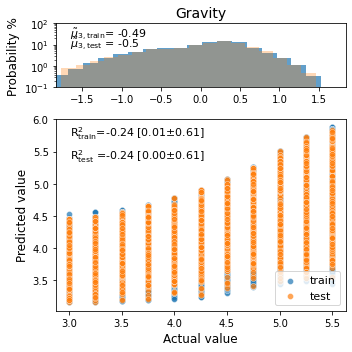

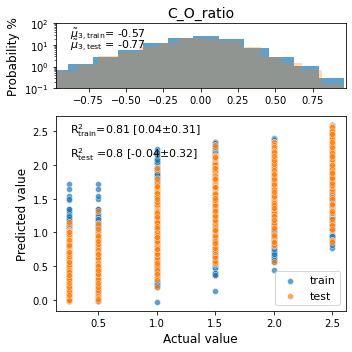

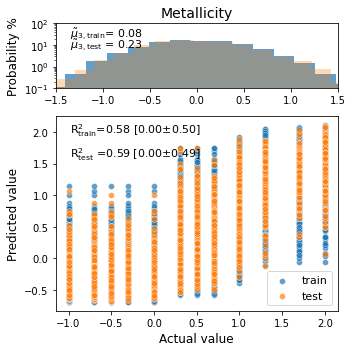

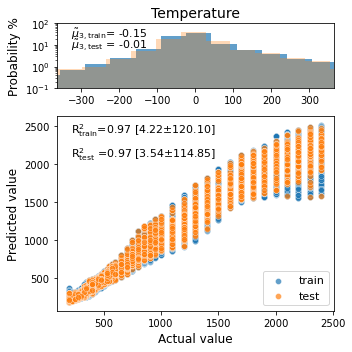

In [37]:
i = 1
regression_report(
        trained_model = train_cnn_model.trained_model,
        trained_data_processor = trained_Data_Processor,
        Xtrain = [trained_Data_Processor.X_train_standardized_rowwise[::i],
                  trained_Data_Processor.X_train_standardized_columnwise[::i]],
    
        Xtest  = [trained_Data_Processor.X_test_standardized_rowwise[::i], 
                  trained_Data_Processor.X_test_standardized_columnwise[::i]],
    
        ytrain = trained_Data_Processor.y_train_standardized_columnwise[::i],
    
        ytest  = trained_Data_Processor.y_test_standardized_columnwise[::i],
    
        target_i = 4,
        
        xy_top   = [0.05, 0.7],
        xy_bottom= [0.05, 0.85],
#         print_results = False,        
                 )